In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
!git clone -l -s git://https://github.com/jjjiacopo/qsmchallenge.git repo
%cd repo
!ls
df = pd.read_excel('merged_data_blinded_02_mod_visual.xlsx')

In [3]:
translation = {'algorithm type':
                  {
                      'low-rank Hankel matrix approach': 'iterative',
                      'Deep Learning': 'deep learning',
                      'Spatial-domain iterative reconstruction': 'iterative',
                      'Closed-form direct solution': 'direct',
                      'Closed-form iterations': 'iterative',
                      'Inverse filtering (TKD-like)': 'direct',
                      'Hybrid (multiple categories)': 'hybrid',
                      'Fourier-domain iterative reconstruction': 'iterative',
                      'Iterative ': 'iterative'
                  },
               'solution space':
                  {
                      'low-rank Hankel matrix approach': 'image',
                      'Deep Learning': 'image',
                      'Spatial-domain iterative reconstruction': 'image',
                      'Closed-form direct solution': 'kspace',
                      'Closed-form iterations': 'image',
                      'Inverse filtering (TKD-like)': 'kspace',
                      'Hybrid (multiple categories)': 'unknown',
                      'Fourier-domain iterative reconstruction': 'kspace',
                      'Iterative ': 'unknown'
                  },
                'input':
                  {
                      'Frequency map': 'frequency',
                      'Both': 'multi-echo',
                      'Individual echo phase images': 'multi-echo'
                  },
                'regularization_class':
                  {
                     'Low-rankness of Hankel structured matrix': 'low-rank',
                      'Total-Variation': 'TV', # or L1?
                      'None or does not apply': 'not applicable',
                      'L2': 'L2',
                      'L1, L2, Total-Variation': 'TV + other',
                      'L2, Generalized total variation': 'TGV + other',
                      'L2, Total-Variation': 'TV + other',
                      ' implicit Deep Network Prior': 'DNN prior',
                      'Implicit deep network prior': 'DNN prior',
                      'implicit in network': 'DNN prior',
                      'L1': 'TV', # should this be extra
                      'Total-Variation, L2 norm of Laplacian of harmonic phase': 'TV + other',
                      'L1, Total-Variation': 'TV + other',
                      'vector of a gradient': 'other',
                      'deep learning': 'DNN prior',
                      'Total-Variation, L2 norm of laplacian of harmonic phase': 'TV + other',
                      'Total-Variation, Generalized total variation': 'TV + other',
                      'Generalized total variation': 'TGV',
                      'L1, Generalized total variation': 'TGV + other',
                      'L1, L2': 'multiple'
                  },
                'regularization_other':
                  {
                     'Low-rankness of Hankel structured matrix': True,
                      'Total-Variation': False,
                      'None or does not apply': False,
                      'L2': False,
                      'L1, L2, Total-Variation': False,
                      'L2, Generalized total variation': False,
                      'L2, Total-Variation': False,
                      ' implicit Deep Network Prior': False,
                      'Implicit deep network prior': False,
                      'implicit in network': False,
                      'L1': False,
                      'Total-Variation, L2 norm of Laplacian of harmonic phase': False,
                      'L1, Total-Variation': False,
                      'vector of a gradient': True,
                      'deep learning': False,
                      'Total-Variation, L2 norm of laplacian of harmonic phase': False,
                      'Total-Variation, Generalized total variation': False,
                      'Generalized total variation': False,
                      'L1, Generalized total variation': False,
                      'L1, L2': False,
                  },
                'regularization_tv':
                  {
                     'Low-rankness of Hankel structured matrix': False,
                      'Total-Variation': True,
                      'None or does not apply': False,
                      'L2': False,
                      'L1, L2, Total-Variation': True,
                      'L2, Generalized total variation': False,
                      'L2, Total-Variation': True,
                      ' implicit Deep Network Prior': False,
                      'Implicit deep network prior': False,
                      'implicit in network': False,
                      'L1': True, #really
                      'Total-Variation, L2 norm of Laplacian of harmonic phase': True,
                      'L1, Total-Variation': True,
                      'vector of a gradient': False,
                      'deep learning': False,
                      'Total-Variation, L2 norm of laplacian of harmonic phase': True,
                      'Total-Variation, Generalized total variation': True,
                      'Generalized total variation': False,
                      'L1, Generalized total variation': True,
                      'L1, L2': False,
                  },
                'regularization_tgv':
                  {
                     'Low-rankness of Hankel structured matrix': False,
                      'Total-Variation': False,
                      'None or does not apply': False,
                      'L2': False,
                      'L1, L2, Total-Variation': False,
                      'L2, Generalized total variation': True,
                      'L2, Total-Variation': False,
                      ' implicit Deep Network Prior': False,
                      'Implicit deep network prior': False,
                      'implicit in network': False,
                      'L1': False,
                      'Total-Variation, L2 norm of Laplacian of harmonic phase': False,
                      'L1, Total-Variation': False,
                      'vector of a gradient': False,
                      'deep learning': False,
                      'Total-Variation, L2 norm of laplacian of harmonic phase': False,
                      'Total-Variation, Generalized total variation': True,
                      'Generalized total variation': True,
                      'L1, Generalized total variation': True,
                      'L1, L2': False,
                  },
                'regularization_l2':
                  {
                     'Low-rankness of Hankel structured matrix': False,
                      'Total-Variation': False,
                      'None or does not apply': False,
                      'L2': True,
                      'L1, L2, Total-Variation': True,
                      'L2, Generalized total variation': True,
                      'L2, Total-Variation': True,
                      ' implicit Deep Network Prior': False,
                      'Implicit deep network prior': False,
                      'implicit in network': False,
                      'L1': False,
                      'Total-Variation, L2 norm of Laplacian of harmonic phase': True,
                      'L1, Total-Variation': False,
                      'vector of a gradient': False,
                      'deep learning': False,
                      'Total-Variation, L2 norm of laplacian of harmonic phase': True,
                      'Total-Variation, Generalized total variation': False,
                      'Generalized total variation': False,
                      'L1, Generalized total variation': False,
                      'L1, L2': True,
                  }
              }

In [4]:
for key in ['algorithm type', 'solution space']:
    df[key] = np.array([translation[key][x] for x in df['Algorithm-type']])
for key in ['regularization_class', 'regularization_tv', 'regularization_tgv', 'regularization_l2']:
    df[key] = np.array([translation[key][x] for x in df['Regularization terms']])
df['input'] = np.array([translation['input'].get(x, 'unknown') for x in df['Did your algorithm use the provided frequency map or the four individual echo phase images?']])
df['magnitude info'] = np.array([x == 'Yes' for x in df['Does your algorithm incorporate information derived from magnitude images?']])

In [5]:
all_metrics = ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue',
               #'visual',
               'visual2',
               'rmse_detrend_Blood', 'rmse_detrend_DGM', 
           'DeviationFromLinearSlope', 'CalcStreak',
               'DeviationFromCalcMoment']
metrics = ['rmse', 'visual', 'DeviationFromLinearSlope', 'CalcStreak', 'DeviationFromCalcMoment']
rmse_cutoff = 100

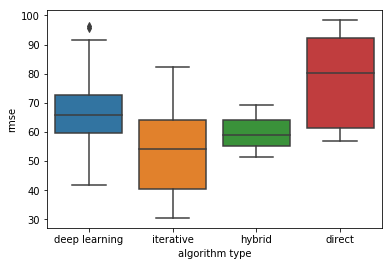

In [6]:
sns.boxplot(x="algorithm type", y="rmse", data=df[df.rmse<rmse_cutoff])

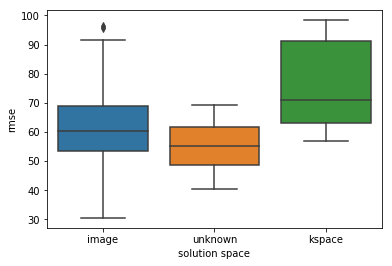

In [7]:
sns.boxplot(x="solution space", y="rmse", data=df[df.rmse<rmse_cutoff])

Number of submissions using input=multi-echo: 56
Number of submissions using input=frequency: 24
Number of submissions using input=unknown: 6


C:\Miniconda3\envs\pt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


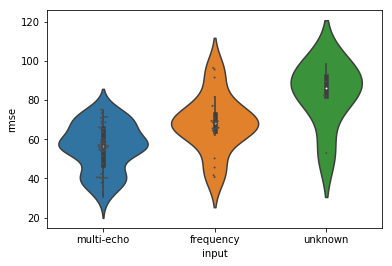

In [8]:
sns.violinplot(x="input", y="rmse", data=df[df.rmse<rmse_cutoff])
sns.swarmplot(x="input", y="rmse", data=df[df.rmse<rmse_cutoff], size=2, color=".3", linewidth=0)
for val in df[df.rmse<rmse_cutoff]['input'].unique():
    print("Number of submissions using input={}: {}".format(val, ((df[df.rmse<rmse_cutoff]['input']==val)==True).sum()))

(34, 26)
(52, 26)


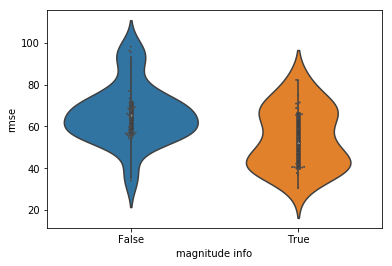

In [9]:
dfrmse = df[df.rmse<rmse_cutoff]
sns.violinplot(x="magnitude info", y="rmse", data=dfrmse)
sns.swarmplot(x="magnitude info", y="rmse", data=dfrmse, size=2, color=".3", linewidth=0)
print(dfrmse[dfrmse['magnitude info']==True].shape)
print(dfrmse[dfrmse['magnitude info']==False].shape)

C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


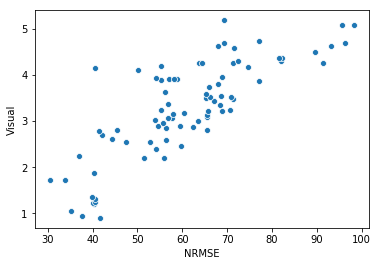

In [10]:
df_ = df[df.rmse<rmse_cutoff][df.rmse_detrend_Blood<200]
df_['Visual'] = 6 - df_['visual2']
df_['NRMSE'] = df_['rmse']
sns.scatterplot(df_['NRMSE'], df_['Visual'])
plt.savefig('scatter_NRMSE_vs_Visual.png', bbox_inches='tight', dpi=300)

C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


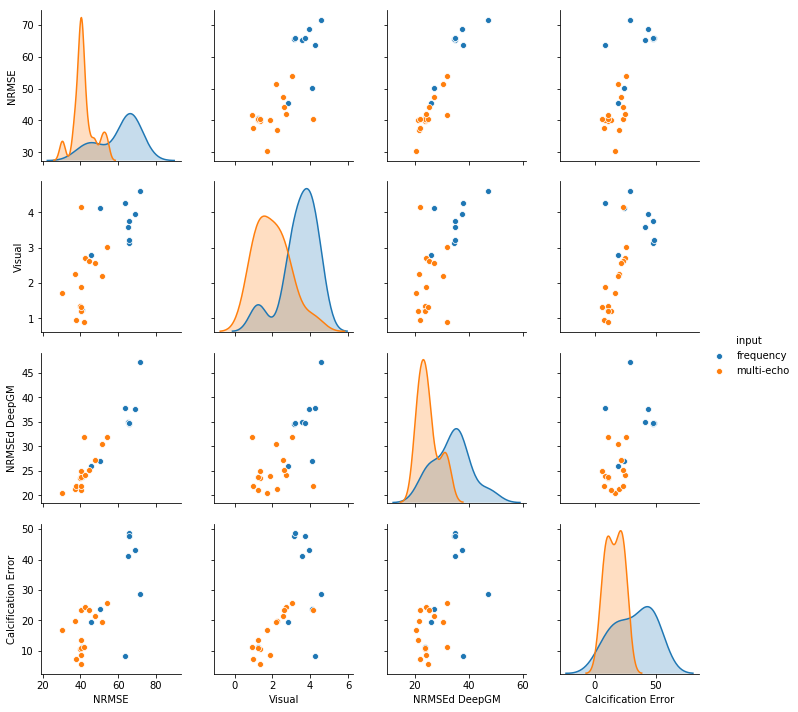

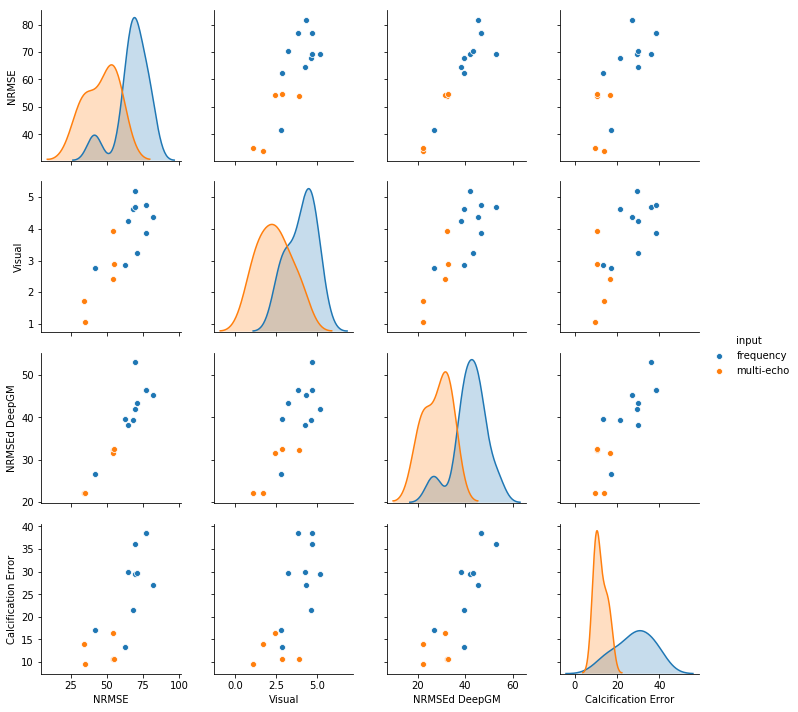

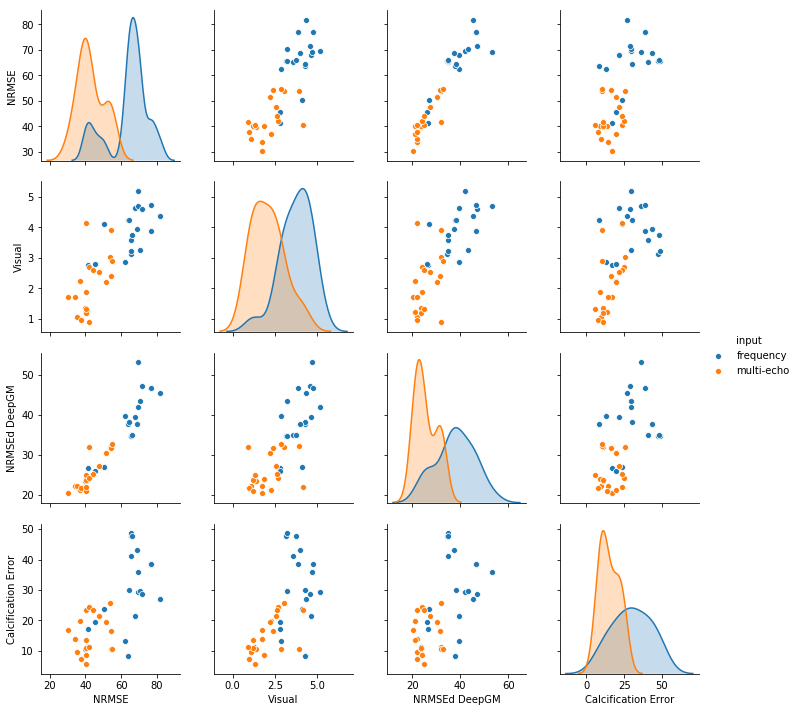

In [66]:
hue = "input"
magmets = ['rmse', 'visual2', #'rmse_detrend_Blood',
           'rmse_detrend_DGM', 
           #'CalcStreak',
           'DeviationFromCalcMoment']
rename = ['NRMSE', 'Visual', #'NRMSEd Blood',
          'NRMSEd DeepGM',
          'Calcification Error']

dfm = df[df.rmse<rmse_cutoff][df.rmse_detrend_Blood<200]
dfm['visual2'] = 6-dfm['visual2']

for met, remet in zip(magmets, rename):
    dfm[remet] = dfm[met]
    
dfmm = pd.concat([dfm[dfm[hue]=='frequency'].sort_values('rmse')[:20], dfm[dfm[hue]=="multi-echo"].sort_values('rmse')[:20]])
sns.pairplot(dfmm[dfmm["magnitude info"]==True][rename + [hue]], hue=hue)
plt.savefig('pairplot_hueinput_usemag.png', bbox_inches='tight', dpi=300)
sns.pairplot(dfmm[dfmm["magnitude info"]==False][rename + [hue]], hue=hue)
plt.savefig('pairplot_hueinput_nomag.png', bbox_inches='tight', dpi=300)
sns.pairplot(dfmm[rename + [hue]], hue=hue)
plt.savefig('pairplot_hueinput.png', bbox_inches='tight', dpi=300)
plt.savefig('pairplot_hueinput.svg')


C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


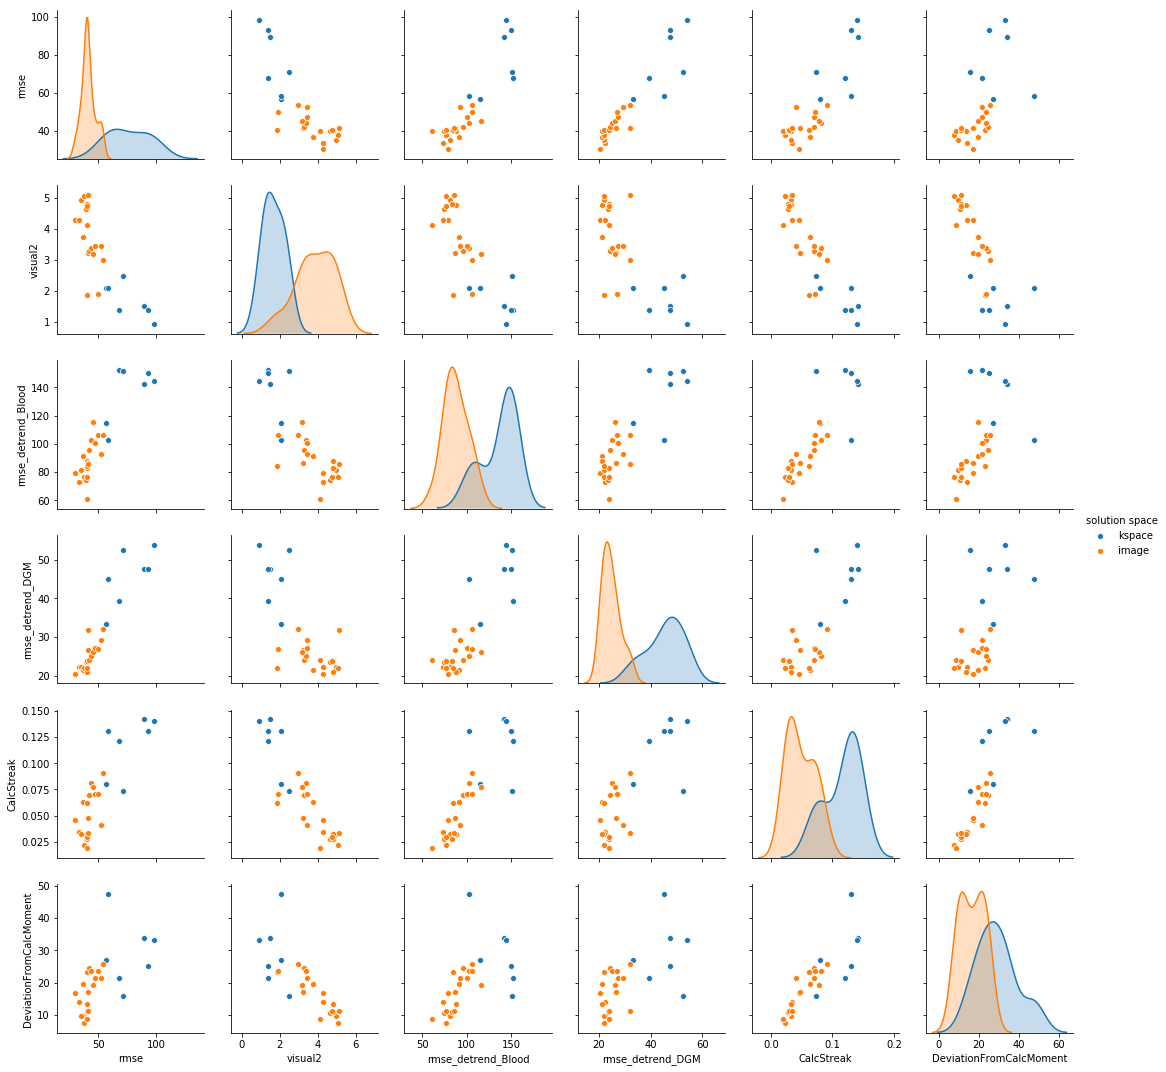

In [12]:
hue = "solution space"
magmets = ['rmse', 'visual2', 'rmse_detrend_Blood', 'rmse_detrend_DGM', 
           'CalcStreak', 'DeviationFromCalcMoment']
dfm = df[df.rmse<rmse_cutoff][df.rmse_detrend_Blood<200]
dfmm = pd.concat([dfm[dfm[hue]=='kspace'].sort_values('rmse')[:20], dfm[dfm[hue]=="image"].sort_values('rmse')[:20]])
sns.pairplot(dfmm[magmets + [hue]], hue=hue)

C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Miniconda3\envs\pt36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Miniconda3\envs\pt36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Miniconda3\envs\pt36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


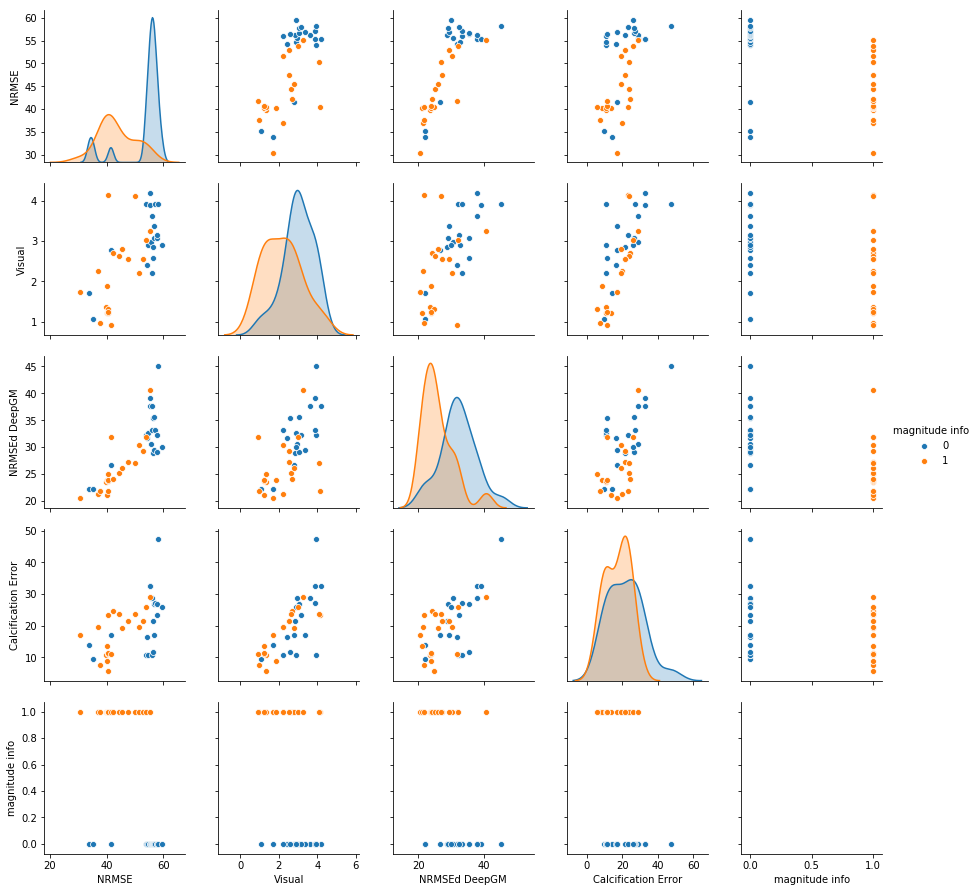

In [13]:
hue = "magnitude info"
magmets = ['rmse', 'visual2', #'rmse_detrend_Blood',
           'rmse_detrend_DGM', 
           #'CalcStreak',
           'DeviationFromCalcMoment']
rename = ['NRMSE', 'Visual', #'NRMSEd Blood',
          'NRMSEd DeepGM',
          'Calcification Error']

dfm = df[df.rmse<rmse_cutoff][df.rmse_detrend_Blood<200]
dfm['visual2'] = 6-dfm['visual2']
dfm['magnitude info'] = 1 * dfm['magnitude info'].astype('int')

for met, remet in zip(magmets, rename):
    dfm[remet] = dfm[met]

dfmm = pd.concat([dfm[dfm[hue]>0].sort_values('rmse')[:20], dfm[dfm[hue]==0].sort_values('rmse')[:20]])
sns.pairplot(dfmm[rename + [hue]], hue=hue)

C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


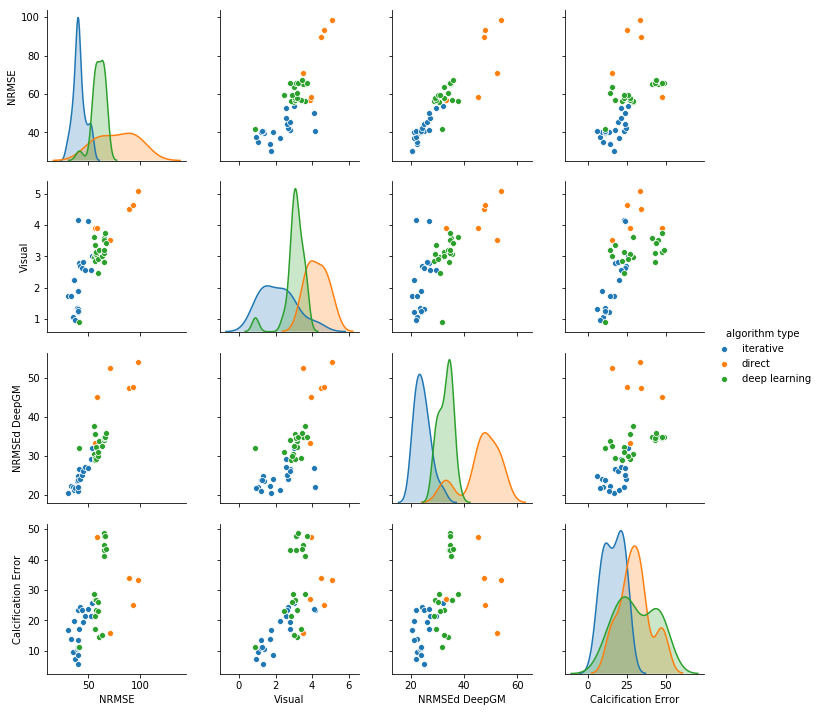

In [67]:
hue = "algorithm type"
magmets = ['rmse', 'visual2', #'rmse_detrend_Blood',
           'rmse_detrend_DGM', 
           #'CalcStreak',
           'DeviationFromCalcMoment']
rename = ['NRMSE', 'Visual', #'NRMSEd Blood',
          'NRMSEd DeepGM',
          'Calcification Error']

dfm = df[df.rmse<rmse_cutoff][df.rmse_detrend_Blood<200]
dfm['visual2'] = 6-dfm['visual2']

for met, remet in zip(magmets, rename):
    dfm[remet] = dfm[met]

dfmm = pd.concat([dfm[dfm[hue]=='iterative'].sort_values('rmse')[:20],
                  dfm[dfm[hue]=="direct"].sort_values('rmse')[:20],
                  dfm[dfm[hue]=="deep learning"].sort_values('rmse')[:20],
                  #dfm[dfm[hue]=="hybrid"].sort_values('rmse')[:20]
                 ])
sns.pairplot(dfmm[rename + [hue]], hue=hue)
plt.savefig('pairplot_algotype_best20_rmse_visual_rmseddgm_calc.png', bbox_inches='tight', dpi=300)
plt.savefig('pairplot_algotype_best20_rmse_visual_rmseddgm_calc.svg')

In [15]:
toplength = 5
df['top5inany'] = np.array([0 for x in df['Does your algorithm incorporate information derived from magnitude images?']])
df['top20inall'] = np.array([1 for x in df['Does your algorithm incorporate information derived from magnitude images?']])
for met in all_metrics:
    df = df.sort_values(met, ascending=(not 'visual' in met))
    df['top5inany'].values[:toplength] += 1
    df['top20inall'].values[20:] *= 0

In [16]:
top5 = df[df.top5inany>0]#[df.top20inall>0]
top5['descr'] = top5['Regularization terms'] + ', '+top5['input'] + ', usemag' + top5['magnitude info'].apply(str)
top5[all_metrics + ['Submission Identifier', 'descr', 'top5inany']].sort_values('top5inany', ascending=False).set_index('Submission Identifier')
top5 = top5.set_index('Submission Identifier')
#f, ax = plt.subplots(figsize=(11, 11))
#sns.heatmap((top5[all_metrics]/top5[all_metrics].max()).sort_values('rmse'), ax=ax, annot=True, fmt="f", linewidths=.5, yticklabels=top5.sort_values('rmse')['descr'])

C:\Miniconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
winners = {}
for met in all_metrics:# + ['visual']:
    win = df.sort_values(met, ascending=(not 'visual' in met)).iloc[0]
    sub = win['Submission Identifier']
    if sub in winners.keys():
        winners[sub].append(met)
    else:
        winners[sub] = [met]
winners

{'5e0YBJKZv1': ['rmse',
  'rmse_detrend',
  'rmse_detrend_Tissue',
  'rmse_detrend_DGM'],
 'CydoTpusUg': ['visual2'],
 'EODh2MXvXX': ['rmse_detrend_Blood', 'CalcStreak'],
 'r4RQwkm3Hd': ['DeviationFromLinearSlope'],
 'wcmrj11111': ['DeviationFromCalcMoment']}

In [18]:
intop5 = {}
for met in all_metrics:# + ['visual']:
    for i in range(toplength):
        #win = df[df.top20inall==1].sort_values(met, ascending=met!='visual').iloc[i]
        win = df.sort_values(met, ascending=(not 'visual' in met)).iloc[i]
        sub = win['Submission Identifier']
        if sub in intop5.keys():
            intop5[sub].append(met)
        else:
            intop5[sub] = [met]

ordered_keys = sorted(list(intop5.keys()), key= lambda k: len(intop5[k]), reverse=True)
for ok in ordered_keys:
    print(ok, len(intop5[ok]), intop5[ok])

WgpBiTiZw9 8 ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue', 'visual2', 'rmse_detrend_Blood', 'rmse_detrend_DGM', 'CalcStreak', 'DeviationFromCalcMoment']
5e0YBJKZv1 4 ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue', 'rmse_detrend_DGM']
aikOpF4Znc 4 ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue', 'rmse_detrend_Blood']
UhzkoFqLbe 4 ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue', 'visual2']
TVmpnl 4 ['rmse', 'rmse_detrend', 'rmse_detrend_Tissue', 'rmse_detrend_DGM']
qm2JVMNaV6 3 ['visual2', 'rmse_detrend_DGM', 'DeviationFromLinearSlope']
EODh2MXvXX 3 ['rmse_detrend_Blood', 'CalcStreak', 'DeviationFromCalcMoment']
CWfiMHI1ij 2 ['visual2', 'CalcStreak']
wgJwSci4bs 2 ['rmse_detrend_Blood', 'CalcStreak']
mojcYZ0HAA 2 ['rmse_detrend_DGM', 'DeviationFromLinearSlope']
wcmrj11111 2 ['CalcStreak', 'DeviationFromCalcMoment']
CydoTpusUg 1 ['visual2']
JS7oM0Anob 1 ['rmse_detrend_Blood']
r4RQwkm3Hd 1 ['DeviationFromLinearSlope']
1CSl5QVJg0 1 ['DeviationFromLinearSlope']
YwJFmu4fpT 1 ['DeviationFromLin

In [19]:
top5.sort_values('top5inany', ascending=False)
top5.to_csv('top5inany.csv')

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [38]:
spider_metrics =  ['rmse', 'visual2', 'DeviationFromLinearSlope', 'CalcStreak', 'DeviationFromCalcMoment', 'rmse_detrend_DGM', 'rmse_detrend_Blood', ]
#dfmin = df.dropna().groupby('regularization_class')[spider_metrics].min()
dfmin = df.dropna().groupby('Regularization terms')[spider_metrics].min()
dfmin['visual2'] = 6 - dfmin['visual2']
datamax = dfmin.values.max(axis=0)

In [39]:
dfmin.max(axis=0)

rmse                        549.589900
visual2                       6.000000
DeviationFromLinearSlope      5.362391
CalcStreak                    0.219571
DeviationFromCalcMoment     173.112600
rmse_detrend_DGM             87.027890
rmse_detrend_Blood          156.835900
dtype: float64

In [40]:
datamax = np.array([100.0, 6.0, 0.1, 0.1, 30.0, 100.0, 100.0])
all_metrics

['rmse',
 'rmse_detrend',
 'rmse_detrend_Tissue',
 'visual2',
 'rmse_detrend_Blood',
 'rmse_detrend_DGM',
 'DeviationFromLinearSlope',
 'CalcStreak',
 'DeviationFromCalcMoment']

In [41]:
colors = ['#1f77b4',
'#aec7e8',
'#ff7f0e',
'#ffbb78',
'#2ca02c',
'#98df8a',
'#d62728',
'#ff9896',
'#9467bd',
'#c5b0d5',
'#8c564b',
'#c49c94',
'#e377c2',
'#f7b6d2',
'#7f7f7f',
'#c7c7c7',
'#bcbd22',
'#dbdb8d',
'#17becf',
'#9edae5']

In [56]:
name_to_color = {}
for num, name in enumerate(top5.index):
    name_to_color[name] = colors[(num+5) % len(colors)]

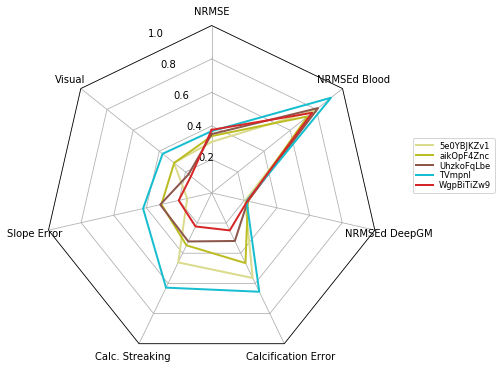

In [62]:
#for metric in (all_metrics + ['visual'])[:1]:
    #dftop = ddf.sort_values(metric, ascending=metric!='visual')[:][spider_metrics + ['name']]

# Sort by rmse
dftop = top5[top5.rmse_detrend_Blood < 100].sort_values('rmse')[spider_metrics][:5]

N = len(spider_metrics)
spoke_labels = spider_metrics
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])
#ax.set_title("top 5 in '{}'".format(metric),  position=(0.5, 1.1), ha='center')

data = dftop[spider_metrics].values
names = dftop.index
dataperc = 1 * data/datamax
for d, name in zip(dataperc, names):
    line = ax.plot(theta, d, color=name_to_color[name], lw=2)
    #ax.fill(theta, d,  alpha=0.1)
ax.set_rmax(1.0)
ax.set_rmin(0.0)
display_metrics = ['NRMSE', 'Visual', 'Slope Error', 'Calc. Streaking', 'Calcification Error', 'NRMSEd DeepGM', 'NRMSEd Blood']
assert len(display_metrics) == len(spoke_labels)
ax.set_varlabels(display_metrics)

legend = ax.legend(dftop.index, loc=(1.1, .5),
                       labelspacing=0.1, fontsize='small')
plt.savefig("radarplot_top5any_rmse.png", bbox_inches='tight', dpi=300)
plt.savefig("radarplot_top5any_rmse.svg")
    #plt.savefig("radarplot_top5_{}.png".format(metric), bbox_inches='tight', dpi=300)

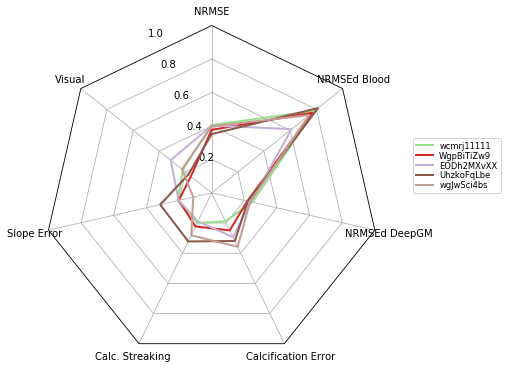

In [63]:
#for metric in (all_metrics + ['visual'])[:1]:
    #dftop = ddf.sort_values(metric, ascending=metric!='visual')[:][spider_metrics + ['name']]

# Sort by calcification error
dftop = top5[top5.rmse_detrend_Blood < 100].sort_values('DeviationFromCalcMoment')[spider_metrics][:5]

N = len(spider_metrics)
spoke_labels = spider_metrics
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])
#ax.set_title("top 5 in '{}'".format(metric),  position=(0.5, 1.1), ha='center')

data = dftop[spider_metrics].values
names = dftop.index
dataperc = 1 * data/datamax
for d, name in zip(dataperc, names):
    line = ax.plot(theta, d, color=name_to_color[name], lw=2)
    #ax.fill(theta, d,  alpha=0.1)
ax.set_rmax(1.0)
ax.set_rmin(0.0)
display_metrics = ['NRMSE', 'Visual', 'Slope Error', 'Calc. Streaking', 'Calcification Error', 'NRMSEd DeepGM', 'NRMSEd Blood']
assert len(display_metrics) == len(spoke_labels)
ax.set_varlabels(display_metrics)

legend = ax.legend(dftop.index, loc=(1.1, .5),
                       labelspacing=0.1, fontsize='small')
plt.savefig("radarplot_top5any_calcerr.png", bbox_inches='tight', dpi=300)
plt.savefig("radarplot_top5any_calcerr.svg")
    #plt.savefig("radarplot_top5_{}.png".format(metric), bbox_inches='tight', dpi=300)

In [34]:
dfs = top5#.set_index('Submission Identifier')
dfs['visual2'] = 6 - dfs['visual2']
mymetrics =['rmse',
 'rmse_detrend',
 'rmse_detrend_Tissue',
 'visual2',
 'rmse_detrend_Blood',
 'rmse_detrend_DGM',
 'DeviationFromLinearSlope',
 'CalcStreak',
 'DeviationFromCalcMoment']
myrenamed= ['NRMSE',
 'dNRMSE',
 'dNRMSE Tissue',
 'Visual',
 'dNRMSE Blood',
 'dNRMSE DeepGM',
 'Slope Error',
 'Calc. Streaking',
 'Calc. Error']
for m, n in zip(mymetrics, myrenamed):
    dfs[n] = dfs[m]
dfscorr = dfs[myrenamed].corr()

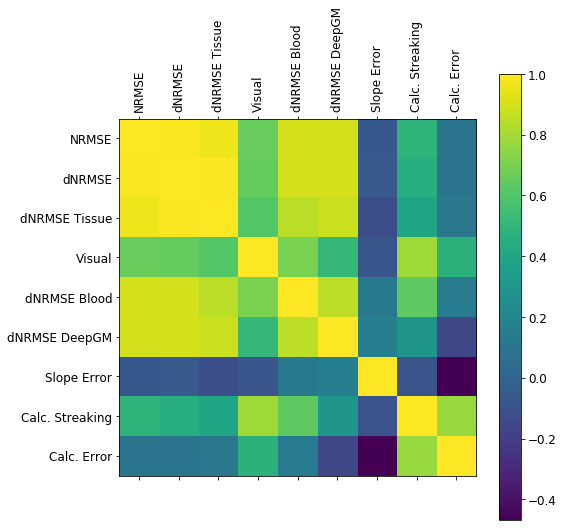

In [35]:
f = plt.figure(figsize=(8, 8))
plt.matshow(dfscorr, fignum=f.number)
plt.xticks(range(dfscorr.shape[1]), dfscorr.columns, fontsize=12, rotation=90)
plt.yticks(range(dfscorr.shape[1]), dfscorr.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.savefig('category_correlations_within_top5.png', bbox_inches='tight', dpi=300)

In [ ]:
dfs[all_metrics].values.shape

In [ ]:
u, s, vh = np.linalg.svd(dfs[all_metrics].values, full_matrices=False)

In [ ]:
plt.matshow(abs(vh)); plt.colorbar()

In [ ]:
plt.plot(s)